In [1]:
# Following Libraries are being used
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import itertools
import time
import statsmodels.api as sm
from sklearn import linear_model #For missing values
from sklearn.preprocessing import StandardScaler #For scaling features

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression #Linear Regressor

In [2]:
data=pd.read_csv("insurance_train.csv")

In [3]:
data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [4]:
data.shape

(381109, 12)

In [5]:
data.columns

Index(['id', 'Gender', 'Age', 'Driving_License', 'Region_Code',
       'Previously_Insured', 'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response'],
      dtype='object')

In [6]:
data.describe

<bound method NDFrame.describe of             id  Gender  Age  Driving_License  Region_Code  Previously_Insured  \
0            1    Male   44                1         28.0                   0   
1            2    Male   76                1          3.0                   0   
2            3    Male   47                1         28.0                   0   
3            4    Male   21                1         11.0                   1   
4            5  Female   29                1         41.0                   1   
...        ...     ...  ...              ...          ...                 ...   
381104  381105    Male   74                1         26.0                   1   
381105  381106    Male   30                1         37.0                   1   
381106  381107    Male   21                1         30.0                   1   
381107  381108  Female   68                1         14.0                   0   
381108  381109    Male   46                1         29.0                  

In [7]:
data.dtypes

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

In [8]:
data.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [9]:
# Make a copy of data
train_data = data.copy()

In [10]:
# Get all features with type 'object'
col_list = [c for c in train_data.columns if train_data[c].dtype == 'object']
col_list

['Gender', 'Vehicle_Age', 'Vehicle_Damage']

In [11]:
# Encode features 
for c in col_list:
        train_data[c] = train_data[c].astype('category')
        train_data[c] = train_data[c].cat.codes #categorizing variables into numbers

In [12]:
# Compare actual and encoded labels for column 'Gender'
print(data['Gender'].unique().tolist())
print(train_data['Gender'].unique().tolist(), '\n')

['Male', 'Female']
[1, 0] 



In [13]:
# Compare actual and encoded labels for column 'Vehicle_Age'
print(data['Vehicle_Age'].unique().tolist())
print(train_data['Vehicle_Age'].unique().tolist(), '\n')

['> 2 Years', '1-2 Year', '< 1 Year']
[2, 0, 1] 



In [14]:
# Compare actual and encoded labels for column 'Vehicle_Damage'
print(data['Vehicle_Damage'].unique().tolist())
print(train_data['Vehicle_Damage'].unique().tolist(), '\n')

['Yes', 'No']
[1, 0] 



In [15]:
train_data.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,2,1,76,1,3.0,0,0,0,33536.0,26.0,183,0
2,3,1,47,1,28.0,0,2,1,38294.0,26.0,27,1
3,4,1,21,1,11.0,1,1,0,28619.0,152.0,203,0
4,5,0,29,1,41.0,1,1,0,27496.0,152.0,39,0


<AxesSubplot:>

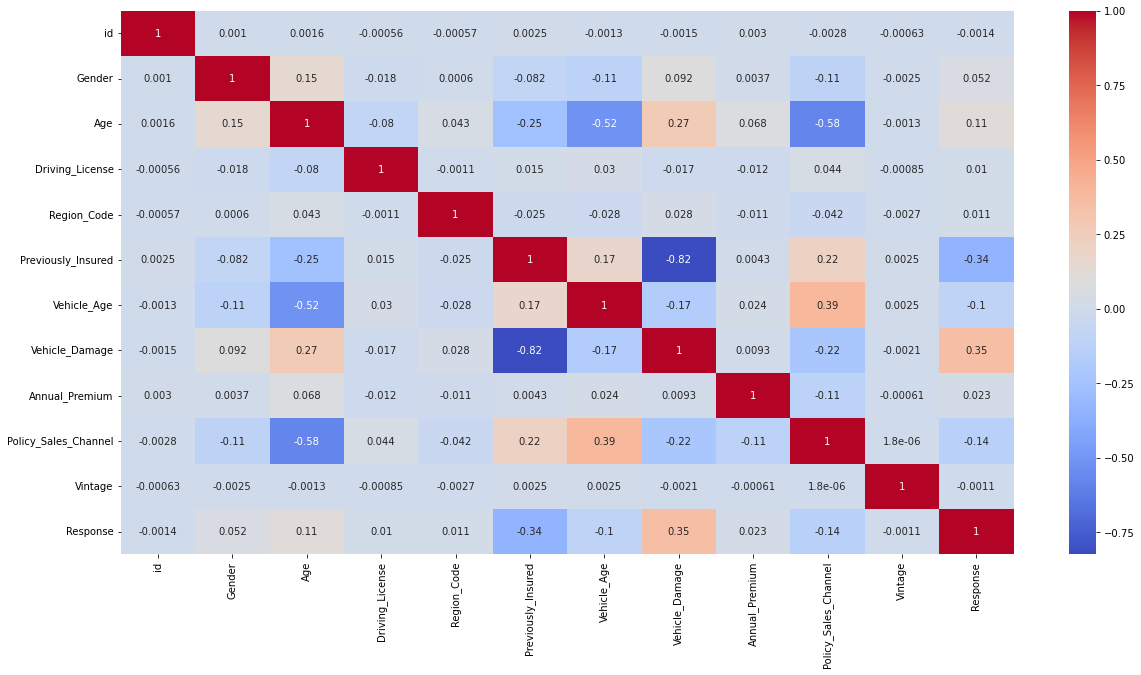

In [16]:
import seaborn as sns
plt.figure(figsize=(20,10))
sns.heatmap(train_data.corr(),annot = True, cmap = 'coolwarm')

## Top3 correlated features with policy_sales_channel are Vehicle_age, Previously_insured and driving license

### Now we will see relation of them one by one and plot best fit line for each case

# Policy_Sales_Channel vs Vehicle_Age

In [17]:
x=train_data.Vehicle_Age.to_numpy()
y=train_data.Policy_Sales_Channel.to_numpy()

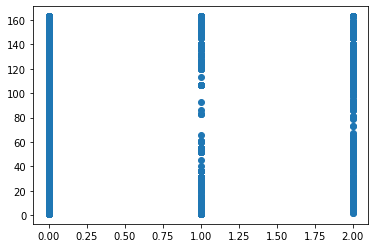

In [18]:
plt.scatter(x,y)

In [19]:
m,c=np.random.random(),np.random.random()

In [20]:
def learn(x,y,m,c,epoch):
    for i in range(epoch):
        error=y-(m*x+c)
        x_error=(y-(m*x+c))*x
        error=np.sum(error)/len(x)
        x_error=np.sum(x_error)/len(x)
        learning_rate = 0.01
        delta_m= learning_rate *x_error
        delta_c =learning_rate*error
        m+=delta_m
        c+=delta_c
    return(m,c)   

In [21]:
m,c=learn(x,y,m,c,200)

In [22]:
x1=[0,1]
y1=[0*m+c,1*m+c]

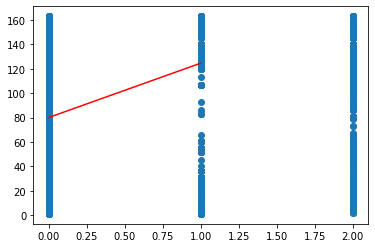

In [23]:
plt.scatter(x,y)
plt.plot(x1,y1,color='red')

# Policy_Sales_Channel vs Previously_Insured

In [24]:
x=train_data.Previously_Insured.to_numpy()
y=train_data.Policy_Sales_Channel.to_numpy()

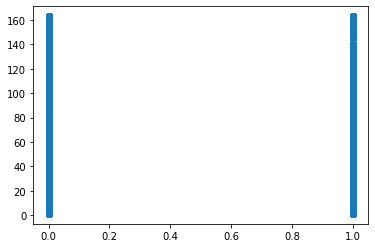

In [25]:
plt.scatter(x,y)

In [26]:
m,c=np.random.random(),np.random.random()

In [27]:
def learn(x,y,m,c,epoch):
    for i in range(epoch):
        error=y-(m*x+c)
        x_error=(y-(m*x+c))*x
        error=np.sum(error)/len(x)
        x_error=np.sum(x_error)/len(x)
        learning_rate = 0.01
        delta_m= learning_rate *x_error
        delta_c =learning_rate*error
        m+=delta_m
        c+=delta_c
    return(m,c)  

In [28]:
m,c=learn(x,y,m,c,200)

In [29]:
x1=[0,1]
y1=[0*m+c,1*m+c]

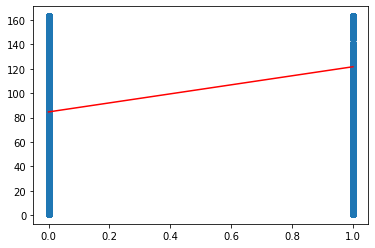

In [30]:
plt.scatter(x,y)
plt.plot(x1,y1,color='red')

# Policy_Sales_Channel vs Driving_License

In [31]:
x=train_data.Driving_License.to_numpy()
y=train_data.Policy_Sales_Channel.to_numpy()

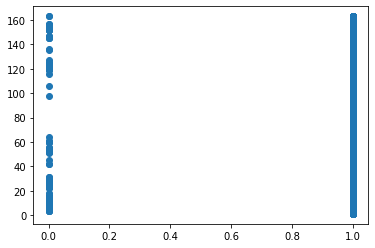

In [32]:
plt.scatter(x,y)

In [33]:
m,c=np.random.random(),np.random.random()

In [34]:
def learn(x,y,m,c,epoch):
    for i in range(epoch):
        error=y-(m*x+c)
        x_error=(y-(m*x+c))*x
        error=np.sum(error)/len(x)
        x_error=np.sum(x_error)/len(x)
        learning_rate = 0.01
        delta_m= learning_rate *x_error
        delta_c =learning_rate*error
        m+=delta_m
        c+=delta_c
    return(m,c)  

In [35]:
m,c=learn(x,y,m,c,200)

In [36]:
x1=[0,1]
y1=[0*m+c,1*m+c]

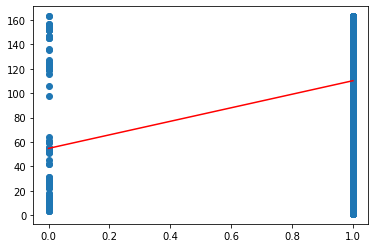

In [37]:
plt.scatter(x,y)
plt.plot(x1,y1,color='red')

# Multiple Regression

In [40]:
# Train Test Split
# Split data to 80% of the training and 20% for the validation
y = train_data['Policy_Sales_Channel']
X = train_data.drop(columns=['Policy_Sales_Channel'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print("Training Set Dimensions:", X_train.shape)
print("Validation Set Dimensions:", X_test.shape)

Training Set Dimensions: (304887, 11)
Validation Set Dimensions: (76222, 11)


In [41]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [42]:
y_pred=model.predict(X_test)

In [43]:
y_pred[1:11]

array([ 64.5852735 , 106.67484968, 102.2186698 , 105.63842448,
        56.17363168,  93.30168044, 149.50248815, 143.03352135,
       151.98104852, 142.93053285])

In [44]:
# Measure mean squared error for validation sets
print('Mean squared Error for Test Set:', mean_squared_error(y_test, y_pred))

Mean squared Error for Test Set: 1885.8090526448316


In [45]:
from sklearn.metrics import mean_absolute_error
# Measure mean absolute error for validation sets
print('Mean absolute Error for Test Set:', mean_absolute_error(y_test, y_pred))

Mean absolute Error for Test Set: 32.919779992070175


In [46]:
from sklearn.metrics import r2_score

In [47]:
# Measure R-squared for validation sets
print('R-squared Error for Test Set:', r2_score(y_test, y_pred))

R-squared Error for Test Set: 0.35925184124474707


# KNN Model: K-Nearest Neighbors Model

In [48]:
from sklearn.neighbors import KNeighborsRegressor

In [49]:
# Fit model
knr = KNeighborsRegressor(n_neighbors = 5)
knr.fit(X_train, y_train)

# Measure mean squared error for training and validation sets
print('Mean squared Error for Training Set:', mean_squared_error(y_train, knr.predict(X_train)))
print('Mean squared Error for Test Set:', mean_squared_error(y_test, knr.predict(X_test)))

Mean squared Error for Training Set: 2245.419180483261
Mean squared Error for Test Set: 3378.6482810737057


# Random Forest Regressor

In [50]:
from sklearn.ensemble import RandomForestRegressor

In [53]:
# Train Random Forest Regressor
randomf = RandomForestRegressor(n_estimators=50)
randomf.fit(X_train, y_train)

# Measure mean squared error for training and validation sets
print('Mean squared Error for Training Set:', mean_squared_error(y_train, randomf.predict(X_train)))
print('Mean squared Error for Test Set:', mean_squared_error(y_test, randomf.predict(X_test)))

Mean squared Error for Training Set: 260.03141731067575
Mean squared Error for Test Set: 1818.2996914014327


feature: id = 0.16542237341118524
feature: Gender = 0.013514839682512408
feature: Age = 0.4316807936161951
feature: Driving_License = 0.0005999408680303731
feature: Region_Code = 0.056850339367500495
feature: Previously_Insured = 0.010409260848805193
feature: Vehicle_Age = 0.02371921491644202
feature: Vehicle_Damage = 0.010104551369982229
feature: Annual_Premium = 0.13655062215771166
feature: Vintage = 0.14290380287946636
feature: Response = 0.008244260882168904


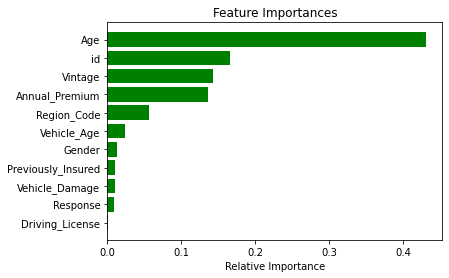

In [54]:
# Important features for random forest regressor
for name, importance in zip(X.columns, randomf.feature_importances_):
    print('feature:', name, "=", importance)
    
importances = randomf.feature_importances_
indices = np.argsort(importances)
features = X.columns
plt.figure(figsize=(6, 4))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

# Bagging Regressor

In [55]:
from sklearn.ensemble import BaggingRegressor 

In [56]:
# Fit model
br = BaggingRegressor(random_state=42)
                            
br.fit(X_train, y_train)

# Measure mean squared error for training and validation sets
print('Mean squared Error for Training Set:', mean_squared_error(y_train, br.predict(X_train)))
print('Mean squared Error for Test Set:', mean_squared_error(y_test, br.predict(X_test)))

Mean squared Error for Training Set: 343.37861158396385
Mean squared Error for Test Set: 1945.3386800398835


# Ridge Regression

In [57]:
X = train_data[['Driving_License','Previously_Insured','Vehicle_Age']]
Y = train_data['Policy_Sales_Channel']

In [58]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=1)
print(X_train.shape, X_test.shape, y_train.shape,y_test.shape)

(304887, 3) (76222, 3) (304887,) (76222,)


In [59]:
from sklearn.linear_model import Ridge
ridgeReg=Ridge(alpha=0.05, normalize=True)
ridgeReg.fit(X_train,y_train)
pred=ridgeReg.predict(X_test)
mse=np.mean((pred-y_test)**2)
mse

2420.5118680811775

In [60]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from math import sqrt
print(ridgeReg.coef_)
print("Intercept: %0.3f" % ridgeReg.intercept_)
print("R2 score : %.3f" % r2_score(y_test,ridgeReg.predict(X_test)))
print("MSE: %.3f" % mean_squared_error(y_test, ridgeReg.predict(X_test)))
print("RMSE: %.3f" % sqrt(mean_squared_error(y_test, ridgeReg.predict(X_test))))
print("MAE: %.3f" % sqrt(mean_absolute_error(y_test, ridgeReg.predict(X_test))))

[35.04236752 16.44851209 32.33923342]
Intercept: 52.812
R2 score : 0.174
MSE: 2420.512
RMSE: 49.199
MAE: 6.421


In [61]:
import statsmodels.api as sm
X_train_sm=sm.add_constant(X_train)
lr=sm.OLS(y_train,X_train_sm).fit()
lr.params
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                             
================================================================================
Dep. Variable:     Policy_Sales_Channel   R-squared:                       0.176
Model:                              OLS   Adj. R-squared:                  0.176
Method:                   Least Squares   F-statistic:                 2.170e+04
Date:                  Sat, 18 Jun 2022   Prob (F-statistic):               0.00
Time:                          21:42:41   Log-Likelihood:            -1.6206e+06
No. Observations:                304887   AIC:                         3.241e+06
Df Residuals:                    304883   BIC:                         3.241e+06
Df Model:                             3                                         
Covariance Type:              nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 50.6994      1.942     26.108      0.000      46.893      54.505
Driving_License       36.1291      1.944     18.583      0.000      32.319      39.940
Previously_Insured    16.9591      0.182     93.332      0.000      16.603      17.315
Vehicle_Age           33.8770      0.157    216.192      0.000      33.570      34.184
==============================================================================
Omnibus:                    31636.318   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            41518.796
Skew:                          -0.894   Prob(JB):                         0.00
Kurtosis:                       2.727   Cond. No.                         49.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Conclusion

### Among all the applied techniques random forest model is best as it has lowest mse which can be further reduced by increasing number of estimators(initially considered 50) and rest all has high values and in ranfom forest regressor we also have shown each feature importance.